In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
filename =  'slurm-880KEquilLongLong'
listNotNumbers = []
with open(filename) as f:
    i = 0
    for iline in f:
        try:
            a = [float(x) for x in iline.split()]
        except ValueError:
            listNotNumbers.append(i)
        i += 1

In [5]:
df = pd.read_csv(filename, sep='\s+', header=None, skiprows=listNotNumbers, usecols=np.arange(11))
names = ['step', 'Lx', 'Ly', 'Lz', 'Press', 'Pxx', 'Pyy', 'Pzz', 'PotEng','totEng', 'temp']
df.rename(dict(zip(df.columns, names)), inplace='True', axis=1)
df['volume'] = df['Lx']*df['Ly']*df['Lz']
df['time'] = df['step']*0.001
df.head()

step         Lx         Ly         Lz       Press         Pxx         Pyy  \
0     0  40.389297  40.389297  40.389297  11022.1630  10873.7470  11137.8070   
1   100  40.418541  40.418541  40.418541  26120.0320  25966.7780  26047.8040   
2   200  40.504181  40.504181  40.504181  21762.7420  21770.5320  21616.6620   
3   300  40.625017  40.625017  40.625017  12886.1840  13029.6200  12728.5730   
4   400  40.750372  40.750372  40.750372   5756.3705   5833.7189   5480.4211   

          Pzz     PotEng     totEng       temp        volume  time  
0  11054.9350 -13638.194 -13183.426  880.00000  65886.870857   0.0  
1  26345.5130 -13432.442 -13185.977  476.92213  66030.091307   0.1  
2  21901.0320 -13408.271 -13192.087  418.32638  66450.700780   0.2  
3  12900.3590 -13426.639 -13198.302  441.84410  67047.203311   0.3  
4   5954.9714 -13411.597 -13201.642  406.27367  67669.775080   0.4

In [6]:
df['step'].shape

(2203,)

Text(0.5, 0, '$ps$')

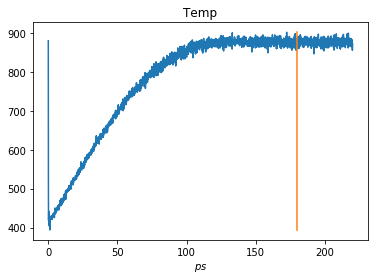

In [7]:
start = 0
x = df['time'][start:]
y = df['temp'][start:]
plt.plot(x, y)
plt.plot([180, 180], [np.min(y), np.max(y)])
plt.title('Temp')
plt.xlabel('$ps$')

Text(0.5, 0, '$ps$')

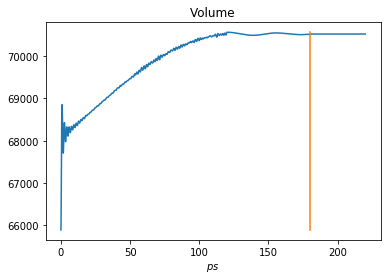

In [8]:
start = 0
x = df['time'][start:]
y = df['volume'][start:]
plt.plot(x, y)
plt.plot([180, 180], [np.min(y), np.max(y)])
plt.title('Volume')
plt.xlabel('$ps$')

Text(0.5, 0, '$ps$')

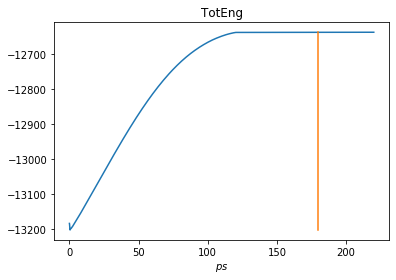

In [9]:
start = 0
x = df['time'][start:]
y = df['totEng'][start:]
plt.plot(x, y)
plt.plot([180, 180], [np.min(y), np.max(y)])
plt.title('TotEng')
plt.xlabel('$ps$')

Text(0.5, 0, '$ps$')

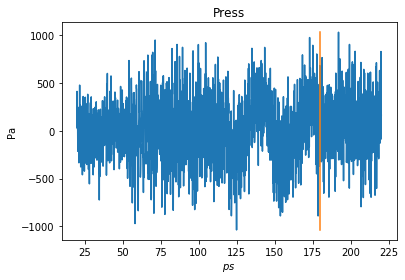

In [10]:
start = 200
x = df['time'][start:]
y = df['Press'][start:]
plt.plot(x, y)
plt.plot([180, 180], [np.min(y), np.max(y)])
plt.title('Press')
plt.ylabel('Pa')
plt.xlabel('$ps$')